# Measuring the performance of a DNN on data.csv

## Import all dependencies

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from keras import models, layers
import matplotlib.pyplot as plt

## Retrieve and transform the data

In [ ]:
ufc_data_location = "../ufcdata/preprocessed_data.csv"

ufc_data = pd.read_csv(ufc_data_location)

In [ ]:
ufc_data

In [ ]:
"""
In this version of the DNN I am just training using the numerical
columns
"""
numerical_cols = []
categorical_cols = []
for col, col_type in zip(ufc_data.dtypes.keys(), ufc_data.dtypes):
    if col_type == "float64" or col_type == "int64":
        numerical_cols.append(col)
    else:
        categorical_cols.append(col)
        
print(numerical_cols)

In [ ]:
# Create the features and labels column
labels = ufc_data["Winner"]
le = LabelEncoder()
le.fit(labels)

features = ufc_data[numerical_cols]
labels = le.transform(labels)

In [ ]:
labels

In [ ]:
# Retrieving train and test splits
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.8)
X_train = X_train.values
X_test = X_test.values
print("X_train length {}, y_train length {}".format(X_train.shape, y_train.shape))
print("X_test length {}, y_test length {}".format(X_test.shape, y_test.shape))

## Create a model

In [ ]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(158,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

## Train the model

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

## Evaluate the model

In [ ]:
plot_training_results(history)

## Summary of DNN on preprocessed_data.csv:

- This model was trained on 158 columns without any dimensinality reduction performed.
- With the raw preprocessed data, it seems like the DNN's is not strong enough to model all of these columns because we can't acheive higher than 80% on the training data. Usually these models should be able to overfit on the training data. We will need to perform some dimensionality reduction.

# Measuring the performance of a DNN on preprocessed_ratio_data.csv

## Retrieve and transform the data

In [55]:
ufc_data_location = "../ufcdata/preprocessed_ratio_data.csv"

ufc_data = pd.read_csv(ufc_data_location)
ufc_data = ufc_data.drop(ufc_data.columns[0], axis=1)

In [56]:
ufc_data

,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_KD,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_pct,...,B_head_def_success,R_head_def_success,B_leg_def_success,R_leg_def_success,B_sig_str_def_success,R_sig_str_def_success,B_td_def_success,R_td_def_success,B_total_landed_def_success,R_total_landed_def_success
0,Red,True,5,0.0,4.0,0.0,0.800000,0.400000,0.000000,0.466000,...,0.237374,0.227332,0.705882,0.648936,0.344697,0.325911,0.400000,0.111111,0.356877,0.391855
1,Red,True,5,0.0,3.0,0.0,0.000000,0.800000,0.000000,0.399000,...,0.315251,0.200924,0.705882,0.622549,0.395595,0.386897,0.391304,0.260870,0.497690,0.520325
2,Red,False,3,0.0,3.0,0.0,0.645161,0.935484,0.096774,0.496129,...,0.376729,0.296422,0.816901,0.733333,0.473433,0.361918,0.107692,0.232558,0.495823,0.377937
3,Blue,False,3,0.0,4.0,0.0,0.500000,0.500000,0.250000,0.550000,...,0.260606,0.263328,0.586207,0.839623,0.311275,0.404735,0.166667,0.000000,0.326969,0.424539
4,Blue,False,3,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.310000,...,0.370492,0.323699,0.952381,0.681818,0.437956,0.409091,0.000000,0.000000,0.437956,0.458678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3587,Red,False,1,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.660000,...,0.500000,0.333333,0.333333,0.000000,0.333333,0.333333,1.000000,0.000000,0.333333,0.818182
3588,Red,False,1,0.0,1.0,0.0,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.500000,0.200000,1.000000
3589,Red,True,1,0.0,2.0,0.0,0.500000,0.000000,0.000000,0.620000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3590,Red,False,1,0.0,1.0,0.0,0.000000,0.000000,0.000000,1.000000,...,0.250000,0.000000,0.666667,0.000000,0.500000,0.000000,0.000000,0.000000,0.800000,0.000000


In [57]:
"""
Retrieve all of the feature columns
"""
numerical_cols = []
categorical_cols = []
for col, col_type in zip(ufc_data.dtypes.keys(), ufc_data.dtypes):
    if col_type == "float64" or col_type == "int64":
        numerical_cols.append(col)
    else:
        categorical_cols.append(col)
        
print(len(numerical_cols))

122


In [58]:
# Create the features and labels column
labels = ufc_data["Winner"]
le = LabelEncoder()
le.fit(labels)

features = ufc_data[numerical_cols]
labels = le.transform(labels)

In [52]:
# Retrieving train and test splits
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.8)
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = X_train.values - mean
X_train = X_train / std
X_test = X_test.values - mean
X_test = X_test / std
print("X_train length {}, y_train length {}".format(X_train.shape, y_train.shape))
print("X_test length {}, y_test length {}".format(X_test.shape, y_test.shape))

X_train length (2873, 122), y_train length (2873,)
X_test length (719, 122), y_test length (719,)


## Create a model

In [40]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(122,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               31488     
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 257       
Total params: 163,329
Trainable params: 163,329
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [42]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Train on 2873 samples, validate on 719 samples
Epoch 1/50
2873/2873 [==============================] - 1s 278us/step - loss: 4.3389 - accuracy: 0.5653 - val_loss: 0.9243 - val_accuracy: 0.4618
Epoch 2/50
2873/2873 [==============================] - 0s 134us/step - loss: 0.9684 - accuracy: 0.5924 - val_loss: 0.7138 - val_accuracy: 0.6161
Epoch 3/50
2873/2873 [==============================] - 0s 125us/step - loss: 0.6883 - accuracy: 0.6356 - val_loss: 0.7525 - val_accuracy: 0.5313
Epoch 4/50
2873/2873 [==============================] - 0s 168us/step - loss: 0.6946 - accuracy: 0.6338 - val_loss: 0.7177 - val_accuracy: 0.5522
Epoch 5/50
2873/2873 [==============================] - 0s 124us/step - loss: 0.7496 - accuracy: 0.6154 - val_loss: 1.1710 - val_accuracy: 0.6203
Epoch 6/50
2873/2873 [==============================] - 0s 131us/step - loss: 0.6971 - accuracy: 0.6272 - val_loss: 0.6736 - val_accuracy: 0.5981
Epoch 7/50
2873/2873 [==============================] - 0s 156us/step - loss:

## Evaluate the model

/Users/jamesperalta/PythonEnvs/ENSF-519/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


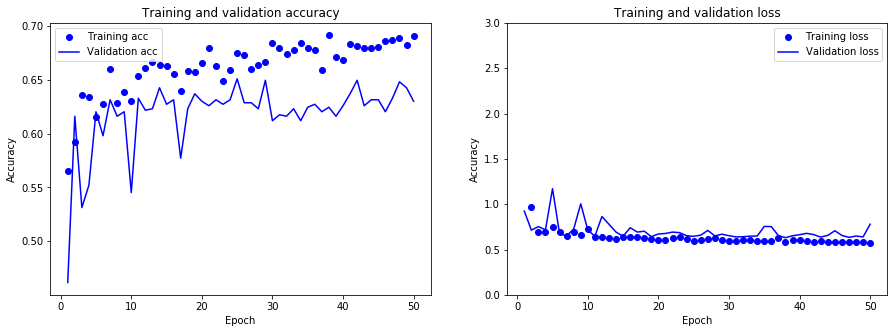

In [43]:
plot_training_results(history)

# Helper functions

In [30]:
def plot_training_results(history_obj):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)

    fig, (accuracy_axis, loss_axis) = plt.subplots(1, 2, figsize=(15, 5))

    accuracy_axis.plot(epochs, acc, 'bo', label='Training acc')
    accuracy_axis.plot(epochs, val_acc, 'b', label='Validation acc')
    accuracy_axis.set_title('Training and validation accuracy')
    accuracy_axis.set_ylabel('Accuracy')
    accuracy_axis.set_xlabel('Epoch')
    accuracy_axis.legend()

    loss_axis.plot(epochs, loss, 'bo', label='Training loss')
    loss_axis.plot(epochs, val_loss, 'b', label='Validation loss')
    loss_axis.set_title('Training and validation loss')
    loss_axis.set_ylim(0, 3)
    loss_axis.set_ylabel('Accuracy')
    loss_axis.set_xlabel('Epoch')
    loss_axis.legend()
    fig.show()